In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets.CIFAR10
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
print('Numer of Training Samples:')
print(f'Number of X Traing samples are : {x_train.shape[0]} ')
print(f'Number of Y Traing samples are : {y_train.shape[0]} ')
print('=====================================================')
print('Number of Test Samples: ')
print(f'Number of X test are : {x_test.shape[0]}')
print(f'Number of Y test are : {y_test.shape[0]} ')

Numer of Training Samples:
Number of X Traing samples are : 50000 
Number of Y Traing samples are : 50000 
Number of Test Samples: 
Number of X test are : 10000
Number of Y test are : 10000 


### Image size
With the following queries we will know the size of images

In [4]:
print(f'Size of Images is : {len(x_train[1])}x{len(x_train[2])}')

Size of Images is : 32x32


In [5]:
print(f'Number of color channels in training dataset are : {x_train.shape[3]} ')

print('=====================================================')

print(f'Number of color channels in test data sets are : {x_test.shape[3]}')

Number of color channels in training dataset are : 3 
Number of color channels in test data sets are : 3


In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
def plot_samples(X,y,index):
  plt.figure(figsize=(12,2)) #controlled image size 
  plt.imshow(X[index]) #to show image
  plt.xlabel(classes[y[index]])     #checking image class

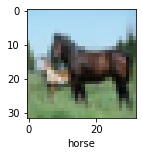

In [9]:
plot_samples(x_train,y_train,12) #function created to see image and class label as well (you can change index to see different image with label)

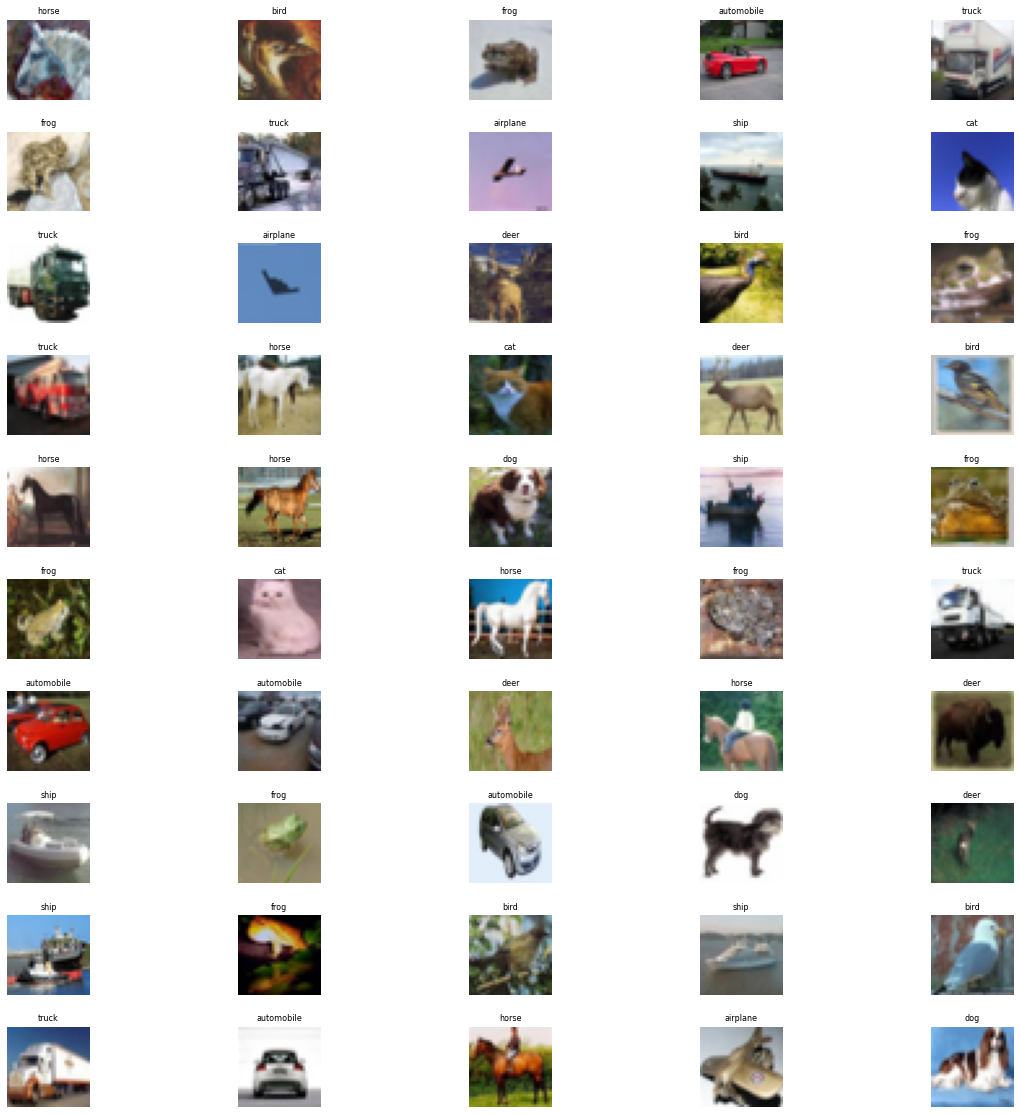

In [10]:

W_grid = 5
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# 

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(classes[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [11]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [12]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
print(f'Number of samples for {classes[0]} class are : {np.count_nonzero(x_train[0]) + np.count_nonzero(x_test[0])}')
print(f'Number of samples for {classes[1]} class are : {np.count_nonzero(x_train[1]) + np.count_nonzero(x_test[1])}')
print(f'Number of samples for {classes[2]} class are : {np.count_nonzero(x_train[2]) + np.count_nonzero(x_test[2])}')
print(f'Number of samples for {classes[3]} class are : {np.count_nonzero(x_train[3]) + np.count_nonzero(x_test[3])}')
print(f'Number of samples for {classes[4]} class are : {np.count_nonzero(x_train[4]) + np.count_nonzero(x_test[4])}')
print(f'Number of samples for {classes[5]} class are : {np.count_nonzero(x_train[5]) + np.count_nonzero(x_test[5])}')
print(f'Number of samples for {classes[6]} class are : {np.count_nonzero(x_train[6]) + np.count_nonzero(x_test[6])}')
print(f'Number of samples for {classes[7]} class are : {np.count_nonzero(x_train[7]) + np.count_nonzero(x_test[7])}')
print(f'Number of samples for {classes[8]} class are : {np.count_nonzero(x_train[8]) + np.count_nonzero(x_test[8])}')
print(f'Number of samples for {classes[9]} class are : {np.count_nonzero(x_train[9]) + np.count_nonzero(x_test[9])}')


Number of samples for airplane class are : 6137
Number of samples for automobile class are : 6108
Number of samples for bird class are : 6144
Number of samples for cat class are : 6144
Number of samples for deer class are : 6133
Number of samples for dog class are : 6142
Number of samples for frog class are : 6139
Number of samples for horse class are : 6144
Number of samples for ship class are : 6144
Number of samples for truck class are : 6144


Distribution for each class in train dataset

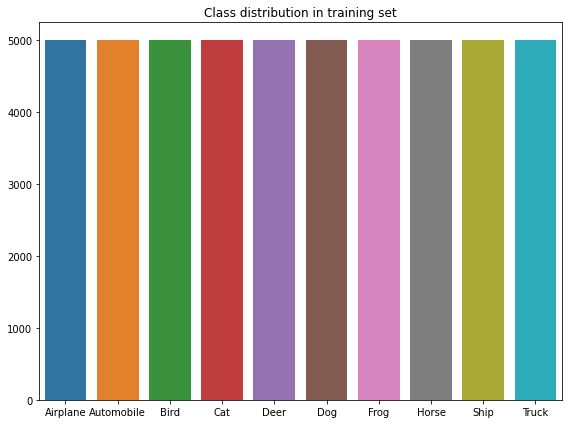

In [15]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
import seaborn as sns 
classes, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8,6))
sns.barplot(classes_name, counts)
plt.title('Class distribution in training set')
plt.tight_layout()
plt.show()

## LeNet Model Training

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
import torch.nn as nn

class LeNet(nn.Module):
   def __init__(self):
       super(LeNet, self).__init__()
       self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2)
       self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
       self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
       self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
       self.fc2 = nn.Linear(in_features=120, out_features=84)
       self.fc3 = nn.Linear(in_features=84, out_features=10)

   def forward(self, x):
       x = self.pool(torch.relu(self.conv1(x)))
       x = self.pool(torch.relu(self.conv2(x)))
       x = x.view(-1, 16 * 5 * 5)
       x = torch.relu(self.fc1(x))
       x = torch.relu(self.fc2(x))
       x = self.fc3(x)
       return x

lenet = LeNet()

In [19]:
torchinfo.summary(lenet, (1, 3, 224, 224), row_settings=['var_names'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

In [21]:

num_epochs = 10
for epoch in range(num_epochs):
   running_loss = 0.0
   for i, data in enumerate(trainloader, 0):
       inputs, labels = data

       optimizer.zero_grad()

       outputs = model(inputs)
       loss = criterion(outputs, labels)
       loss.backward()
       optimizer.step()

       running_loss += loss.item()

   print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

print('Finished Training')

Epoch 1/100
1563/1563 [==============================] - 13s 4ms/step - loss: 1.6399 - accuracy: 0.3995 - val_loss: 1.4154 - val_accuracy: 0.4817
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3584 - accuracy: 0.5114 - val_loss: 1.3227 - val_accuracy: 0.5254
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2241 - accuracy: 0.5630 - val_loss: 1.1896 - val_accuracy: 0.5768
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1243 - accuracy: 0.5991 - val_loss: 1.1216 - val_accuracy: 0.6023
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0489 - accuracy: 0.6260 - val_loss: 1.0975 - val_accuracy: 0.6102
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9887 - accuracy: 0.6492 - val_loss: 1.0592 - val_accuracy: 0.6240
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9366 - accuracy: 0.6678 - val_loss: 1.0537 - val_a

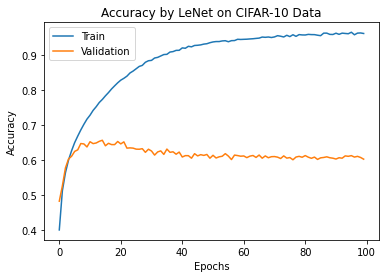

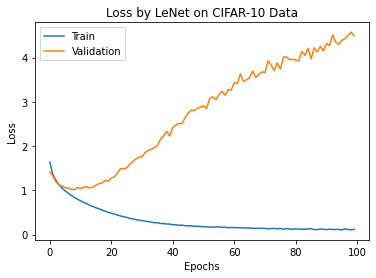

In [22]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

array([[686,  50,  54,  19,  24,  13,  16,  16,  80,  42],
       [ 38, 783,   5,  20,   8,  13,  11,   9,  22,  91],
       [ 91,  23, 482,  95,  96,  89,  63,  31,  16,  14],
       [ 30,  22,  70, 392,  76, 233,  98,  42,  14,  23],
       [ 39,  10, 108,  96, 499,  70,  79,  73,  13,  13],
       [ 25,   9,  63, 220,  51, 508,  44,  51,  11,  18],
       [ 10,  14,  47,  98,  54,  58, 680,  14,  10,  15],
       [ 36,   7,  49,  68,  73,  74,  25, 636,   6,  26],
       [109,  61,  26,  33,  14,  14,  12,  11, 674,  46],
       [ 47, 136,  19,  25,   7,  12,  21,  21,  34, 678]])

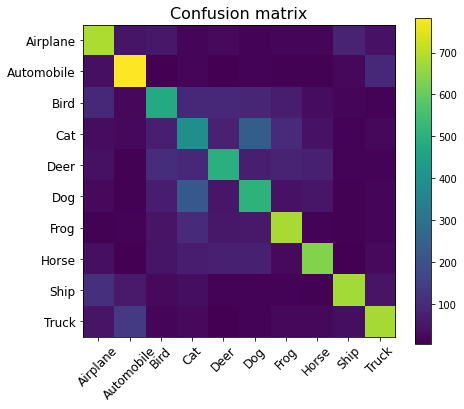

In [24]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes_name, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes_name, fontsize=12)
plt.colorbar()
plt.show()


In [25]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.6018


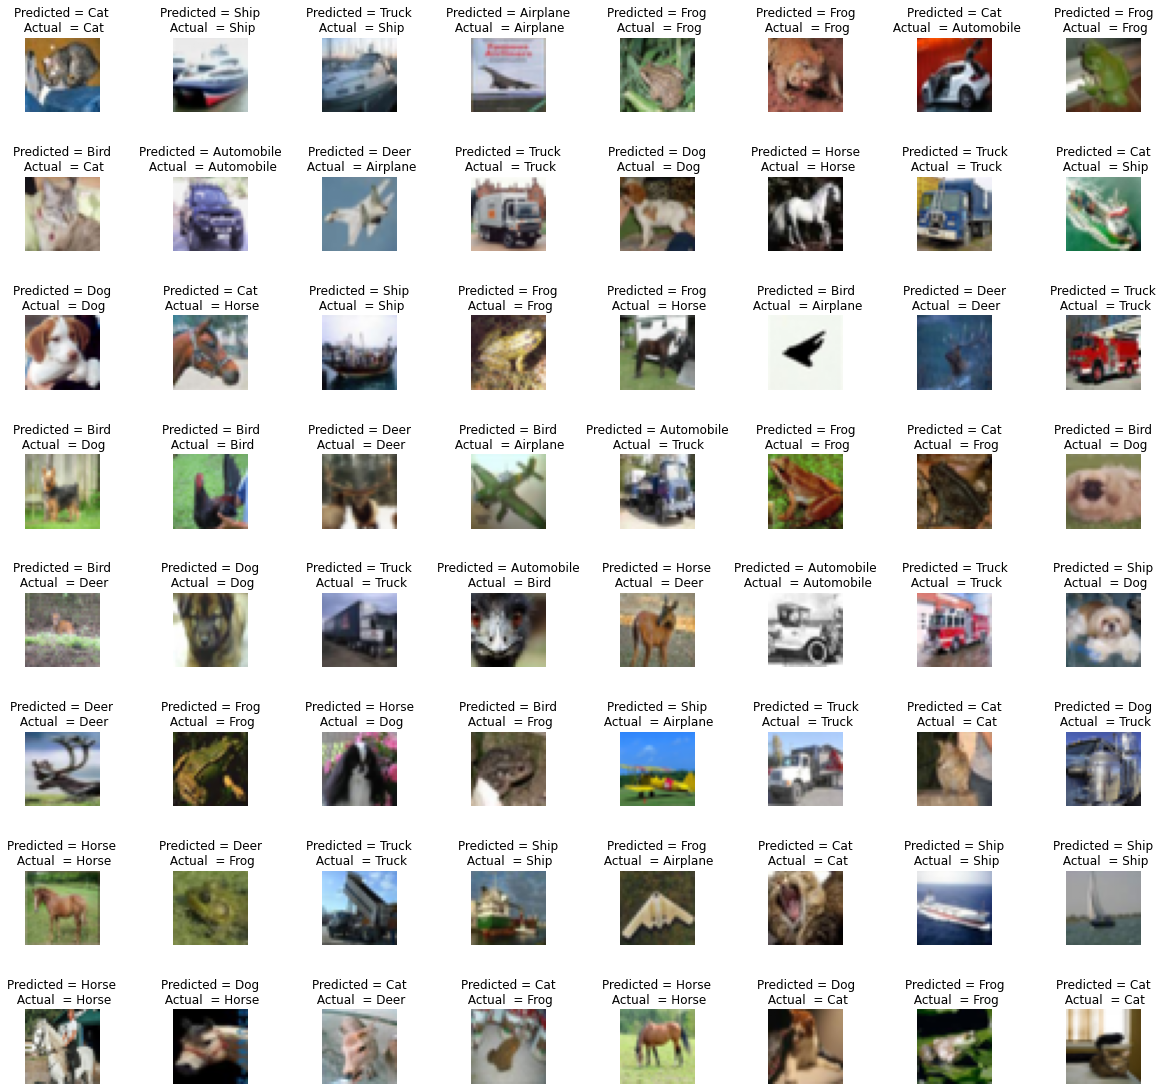

In [26]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes_name[y_predictions[i]], classes_name[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

### Defining AlexNet Model 

In [28]:
import torch.nn as nn
import torch.nn.functional as F

class AlexNet(nn.Module):
   def __init__(self):
       super(AlexNet, self).__init__()
       self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=4)
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
       self.conv2 = nn.Conv2d(16, 60, kernel_size=5, padding=2)
       self.conv3 = nn.Conv2d(60, 60, kernel_size=3, padding=1)
       self.conv4 = nn.Conv2d(60, 30, kernel_size=3, padding=1)
       self.conv5 = nn.Conv2d(30, 20, kernel_size=3, padding=1)
       self.fc1 = nn.Linear(20 * 5 * 5, 200)
       self.fc2 = nn.Linear(200, 200)
       self.fc3 = nn.Linear(200, 10)

   def forward(self, x):
       x = F.relu(self.conv1(x))
       x = self.pool(x)
       x = F.relu(self.conv2(x))
       x = self.pool(x)
       x = F.relu(self.conv3(x))
       x = F.relu(self.conv4(x))
       x = F.relu(self.conv5(x))
       x = x.view(-1, 20 * 5 * 5)
       x = F.relu(self.fc1(x))
       x = F.relu(self.fc2(x))
       x = self.fc3(x)
       return x

alexnet = AlexNet()
summary(alexnet, input_size=(3, 32, 32), row_settings=['var_names'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 8, 16)          448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 60)          24060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 60)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 60)          32460     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 30)          16230     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 20)         

### Training AlexNet model 

In [29]:
num_epochs = 10
for epoch in range(num_epochs):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
      inputs, labels = data

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

  print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

print('Finished Training')

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3008 - accuracy: 0.1179 - val_loss: 2.2964 - val_accuracy: 0.1865
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2464 - accuracy: 0.1759 - val_loss: 2.0765 - val_accuracy: 0.1999
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0556 - accuracy: 0.2026 - val_loss: 1.9982 - val_accuracy: 0.2244
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9534 - accuracy: 0.2413 - val_loss: 1.8810 - val_accuracy: 0.2897
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8214 - accuracy: 0.2986 - val_loss: 1.7461 - val_accuracy: 0.3277
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7268 - accuracy: 0.3363 - val_loss: 1.7004 - val_accuracy: 0.3481
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6616 - accuracy: 0.3690 - val_loss: 1.7159 - val_ac

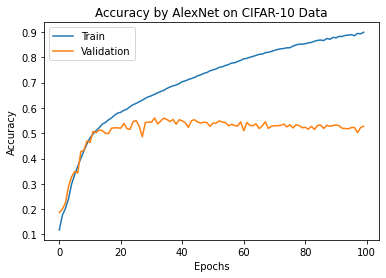

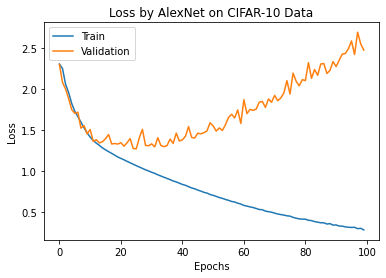

In [30]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

### Confusion Matrix

In [31]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

array([[592,  49,  69,  23,  26,  14,  12,  30, 112,  73],
       [ 42, 614,   7,  18,   7,  16,  14,  17,  65, 200],
       [ 71,  15, 430,  84, 102, 118,  57,  70,  31,  22],
       [ 35,  21,  89, 359,  62, 234,  89,  56,  20,  35],
       [ 38,   6, 155,  64, 415,  87,  83, 124,  19,   9],
       [ 21,  15,  78, 208,  54, 456,  45,  84,  13,  26],
       [  6,  19,  88, 124,  77,  66, 563,  22,  10,  25],
       [ 38,  25,  53,  49,  67, 123,  16, 572,   4,  53],
       [102,  73,  23,  27,  21,   8,   5,  16, 656,  69],
       [ 61, 151,  23,  20,   6,  12,  14,  40,  53, 620]])

### Cnfusion Matrix Plot

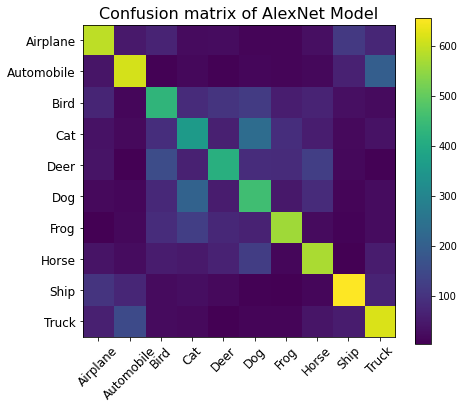

In [32]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes_name, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes_name, fontsize=12)
plt.colorbar()
plt.show()


### Accuracy score on Test Data set

In [33]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

Test accuracy by AlexNet: 0.6018
